# Interactivity and Visualisation

Jupyter also allows you to make your data interactive!!

## Ipywidgets

The first library we'll use is `ipywidgets`, using this allows us to run our code interactively.

If you don't have it we can use magic commands to install it. On local machines this only needs to be done once

In [ ]:
%pip install -q ipywidgets

### Make our first function interactive

In [1]:
import ipywidgets as ipyw
from ipywidgets.widgets import interact

In [2]:
import numpy as np

The interact decorator in ipywidgets allows us to make our function interactive and displays an appropriate widget.

In [3]:
@interact(x=(-2,2, 0.3))
def f(x):
    return np.exp(x*2 +5)

interactive(children=(FloatSlider(value=-0.20000000000000018, description='x', max=2.0, min=-2.0, step=0.3), O…

### Automated inputs

We can do lots of different types of inputs, for example:

In [4]:
@interact(wavelength=(0.1,10.0, 0.3), 
          temperature=(0.1, 10000, 0.1), 
          temperature_scale=['Kelvin', 'Celsius', 'Fahrenheit'])
def weins_law(wavelength=0.1, 
              temperature=0.1, 
              temperature_scale='Kelvin', 
              include_greeting=True):

    h = 6.62607015e-34
    c = 299792458
    kB = 1.380e-23
    I0 = (2.0 * h * c ** 2) / wavelength ** 5
    
    tconv = {
        'Kelvin': lambda x: x,
        'Celsius': lambda x: x + 273.15,
        'Fahrenheit': lambda x: (x + 459.67)*5/9,
    }
    
    chosen_t = tconv[temperature_scale]
    
    result = I0 * np.exp(-( h * c ) / ( wavelength * kB * chosen_t(temperature)))
    
    if include_greeting:
        return f'Hello here is the value you wanted: {result}'
    else:
        return result
    

interactive(children=(FloatSlider(value=0.1, description='wavelength', max=10.0, min=0.1, step=0.3), FloatSlid…

### Customize widgets

We can even customize which widgets are used. We can use a RadioButton instead of a Dropdown for example.

In [5]:
@interact(wavelength=(0.1,10.0, 0.3), 
          temperature=(0.1, 10000, 0.1), 
          temperature_scale=ipyw.RadioButtons(
              options=['Kelvin', 'Celsius', 'Fahrenheit'], 
              value='Kelvin', 
              description="Temp Scale"))
def weins_law_II(wavelength=0.1, 
              temperature=0.1, 
              temperature_scale='Kelvin', 
              include_greeting=True):

    h = 6.62607015e-34
    c = 299792458
    kB = 1.380e-23
    I0 = (2.0 * h * c ** 2) / wavelength ** 5
    
    tconv = {
        'Kelvin': lambda x: x,
        'Celsius': lambda x: x + 273.15,
        'Fahrenheit': lambda x: (x + 459.67)*5/9,
    }
    
    chosen_t = tconv[temperature_scale]
    
    result = I0 * np.exp(-( h * c ) / ( wavelength * kB * chosen_t(temperature)))
    
    if include_greeting:
        return f'Hello here is the value you wanted: {result}'
    else:
        return result

interactive(children=(FloatSlider(value=0.1, description='wavelength', max=10.0, min=0.1, step=0.3), FloatSlid…

All there is to it! You can find more information on widgets [here](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html).

## Matplotlib

Matplotlib is *THE* plotting library in python and likely seen in many publications. If you every see a light blue plot or blue and orange plot in a paper then it's likely made with matplotlib.

To activate it we need to first import it

In [6]:
import matplotlib.pyplot as plt


When using it with Jupyter we need a image backend, we will use the *widget* backend. To use it we need to install the *ipympl* package. We can use a magic command to install it in our environment.

In [7]:
%pip install -q ipympl

You should consider upgrading via the '/Users/ahmed/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


Now activate the backend. Note: You can only set a backend once per kernel, so if you want to change it you need to restart the kernel.

In [8]:
%matplotlib widget

This activates the matplotlib interactive backend. There are many types, including:

 - `widget` (Jupyter lab)
 - `notebook` (Jupyter notebook)
 - `inline` (No interactivity, every figure is a png)

### Plotting your first figure

(-0.9998741276738751, 0.9998741276738751)

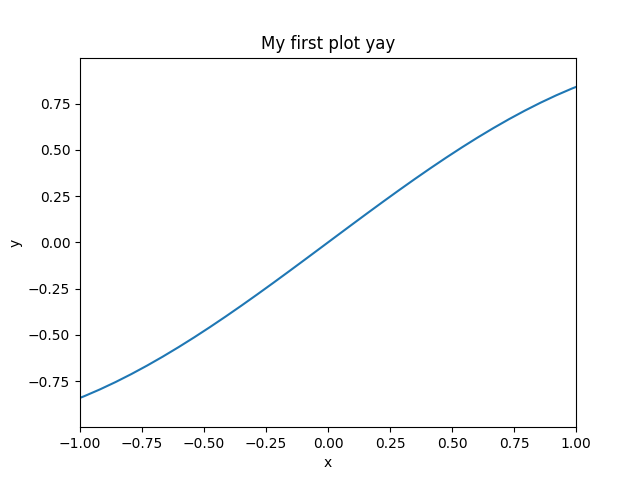

In [9]:

x = np.linspace(-np.pi, np.pi, 100)
y = np.sin(x)

plt.figure()
plt.plot(x, y)
plt.title('My first plot yay')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([-1, 1])
plt.ylim([y.min(), y.max()])

### Plotting multiple figures

We can use the `subplots` function to create multiple figures. It takes arguments of number of rows and number of columns. For example:
 - `subplots(2,1)` 2 rows, 1 columns (2 plots)
 - `subplots(1,2)` 1 rows, 2 columns (2 plots)
 - `subplots(2,2)` 2 rows, 2 columns (4 plots)
 


It will return a `figure` that represents the plot and *axes* that can be unpacked representing columns and rows axes.
For example, `plt.subplots(2,1)` will return 2 axes so we can unpack them like this: `figure, (ax1, ax2) = plt.subplots(2,1)`. Lets try an example:

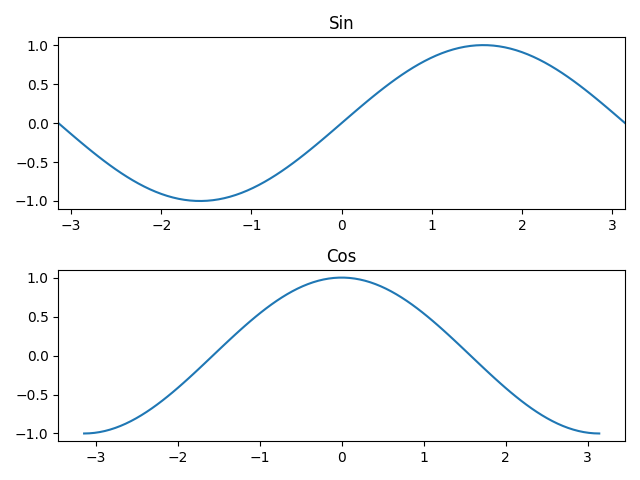

In [10]:
x1 = np.linspace(-np.pi, np.pi, 100)
y1 = np.sin(x1)

y2 = np.cos(x1)

fig, (ax1, ax2) = plt.subplots(2, 1)

ax1.plot(x1, y1)
ax1.set_title('Sin')
ax1.set_xlim([x1.min(), x1.max()])
ax2.plot(x1, y2)
ax2.set_title('Cos')
fig.tight_layout()
plt.show()


For something like `subplots(2,2)` we can *double* unpack them

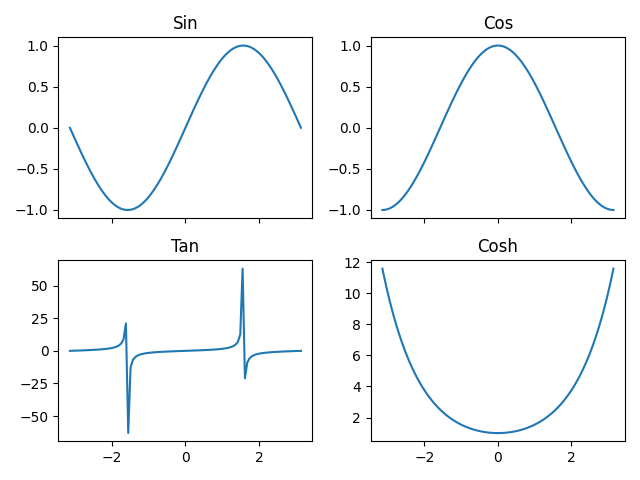

In [13]:
x1 = np.linspace(-np.pi, np.pi, 100)
y1 = np.sin(x1)

y2 = np.cos(x1)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)

ax1.plot(x1, y1)
ax1.set_title('Sin')
ax2.plot(x1, y2)
ax2.set_title('Cos')
ax3.plot(x1, np.tan(x1))
ax3.set_title('Tan')
ax4.plot(x1, np.cosh(x1))
ax4.set_title('Cosh')

fig.tight_layout()

plt.show()


Sometimes your plots can overlap, adding a `fig.tight_layout()` can fix it up!

### Combining interactivity

We can combine ipywidgets to introduce interactivity into our plots. We need to store a reference to the plot data and then update it in the `interact` function.
Lets try it!

interactive(children=(FloatSlider(value=1.0, description='scale', max=7.0, min=1.0), Output()), _dom_classes=(…

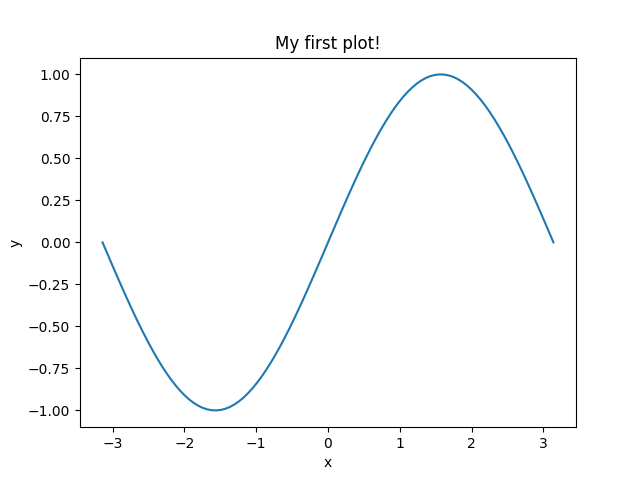

In [15]:
x = np.linspace(-np.pi, np.pi, 100)
y = np.sin(x)

plt.figure()
plt.title('My first plot!')
line, = plt.plot(x, y) # plot returns two things, the first is the line which we need. We are throwing away the second

plt.xlabel('x')
plt.ylabel('y')

@interact(scale=(1.0, 7.0))
def update(scale=1.0):
    
    data = np.sin(scale * x)
    line.set_ydata(data)
    plt.draw()
    
    


### Exercise multi-interactive

Fix the code to make the multi-version update all plots:

interactive(children=(FloatSlider(value=0.0, description='scale', max=10.0, min=-10.0), Output()), _dom_classe…

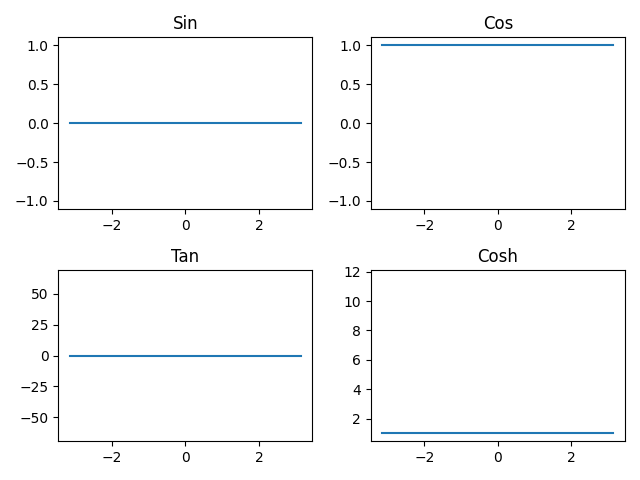

In [18]:
x1 = np.linspace(-np.pi, np.pi, 100)
y1 = np.sin(x1)

y2 = np.cos(x1)
y3 = np.tan(x1)
y4 = np.cosh(x1)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

line, =ax1.plot(x1, y1)
line1, = ax2.plot(x1, y2)
line2, = ax3.plot(x1, y3)
line3, = ax4.plot(x1, y4)


ax1.set_title('Sin')
ax2.set_title('Cos')
ax3.set_title('Tan')
ax4.set_title('Cosh')

fig.tight_layout()

@interact(scale=(-10, 10, 0.1))
def update_multi(scale):
    line.set_ydata(np.sin(x1*scale))
    line1.set_ydata(np.cos(x1*scale))
    line2.set_ydata(np.tan(x1*scale))
    line3.set_ydata(np.cosh(x1*scale))
    

    
    plt.draw()
    


Additionally instead of axis unpacking you can use it like an array for larger grids. For example doing:
    
    fig, ((ax1, ax2......),(ax56, ax57,....)) = plt.subplots(60,60)
can be laborious. You can do this:
    
    fig, ax = plt.subplots(60,60)
    ax[0,0].blah 
    ax[59,10].blah
    
You can also remove axes from a figure for visual quality using the `remove` function. Take a look at this example

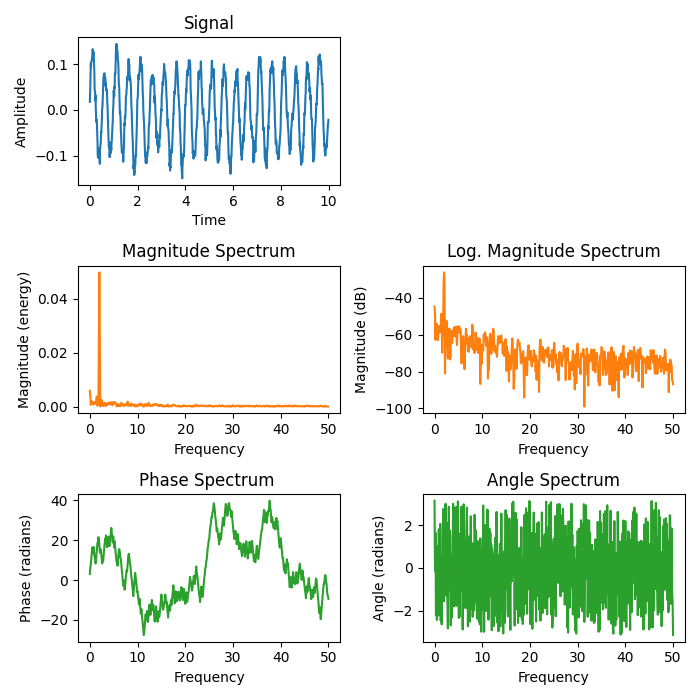

In [21]:
np.random.seed(0)

dt = 0.01  # sampling interval
Fs = 1 / dt  # sampling frequency
t = np.arange(0, 10, dt)

# generate noise:
nse = np.random.randn(len(t))
r = np.exp(-t / 0.05)
cnse = np.convolve(nse, r) * dt
cnse = cnse[:len(t)]

s = 0.1 * np.sin(4 * np.pi * t) + cnse  # the signal

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(7, 7))

# plot time signal:
axs[0, 0].set_title("Signal")
axs[0, 0].plot(t, s, color='C0')
axs[0, 0].set_xlabel("Time")
axs[0, 0].set_ylabel("Amplitude")

# plot different spectrum types:
axs[1, 0].set_title("Magnitude Spectrum")
axs[1, 0].magnitude_spectrum(s, Fs=Fs, color='C1')

axs[1, 1].set_title("Log. Magnitude Spectrum")
axs[1, 1].magnitude_spectrum(s, Fs=Fs, scale='dB', color='C1')

axs[2, 0].set_title("Phase Spectrum ")
axs[2, 0].phase_spectrum(s, Fs=Fs, color='C2')

axs[2, 1].set_title("Angle Spectrum")
axs[2, 1].angle_spectrum(s, Fs=Fs, color='C2')

axs[0,1].remove()

fig.tight_layout()
plt.show()

### Different plot types

Matplotlib has many types of plots You can also mix and match plots on the same plot!

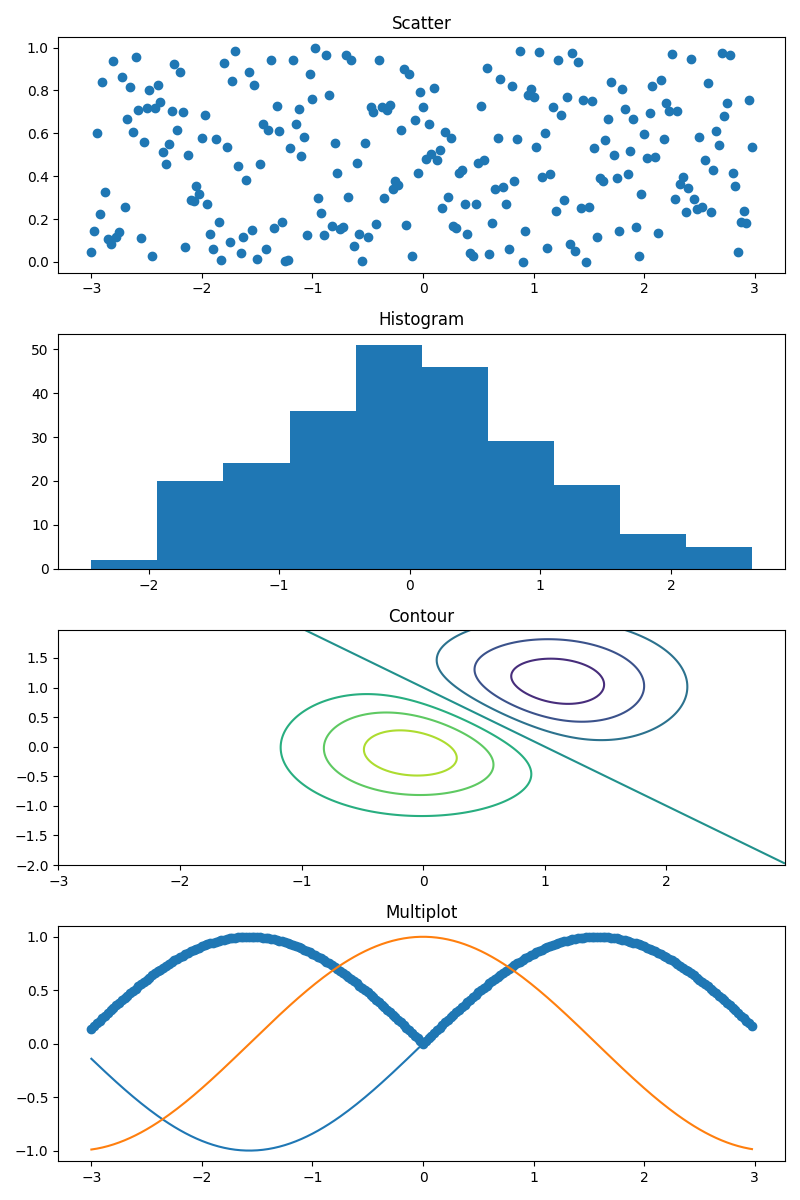

In [23]:
fig, ((ax1,ax2,ax3,ax4)) = plt.subplots(4,1, figsize=(8,12))

delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

ax1.scatter(x, np.random.rand(x.shape[0]), )
ax1.set_title('Scatter')

ax2.hist(np.random.normal(size=(x.shape[0])))
ax2.set_title('Histogram')

ax3.set_title('Contour')
ax3.contour(X, Y, Z)

ax4.set_title('Multiplot')
ax4.plot(x, np.sin(x))
ax4.plot(x, np.cos(x))
ax4.scatter(x, np.abs(np.sin(x)))

#ax3.remove()


fig.tight_layout()
fig.savefig('test.pdf')
plt.show()

Of course any of the figs can be saved into any format using `savefig` for example:
   - `fig.savefig('plot.pdf')`
   - `fig.savefig('plot.jpg')`
   

For publications **pdf** is my choice! Try it on any of the previous plots!

## 2D and 3D

We can also plot in 2D! The function of choice is `imshow`

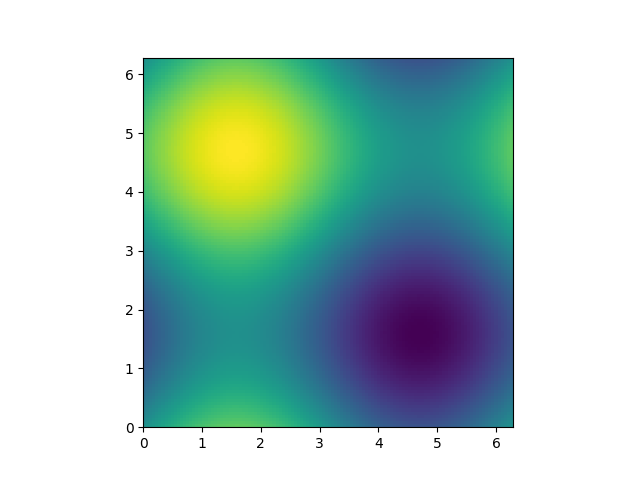

In [24]:
# Gen our coordinates
x = np.linspace(0, 2*np.pi, 120)
y = np.linspace(0, 2*np.pi, 120)

# Make our mesh

X, Y = np.meshgrid(x,y)
def ourfunc(x, y):
    return np.sin(x) + np.sin(y)

plt.figure()
plt.imshow(ourfunc(X,Y), extent=[x.min(), x.max(), y.min(), y.max()])
plt.show()

Again we can make it interactive

interactive(children=(FloatSlider(value=0.0, description='x_shift', max=10.0, min=-10.0), FloatSlider(value=0.…

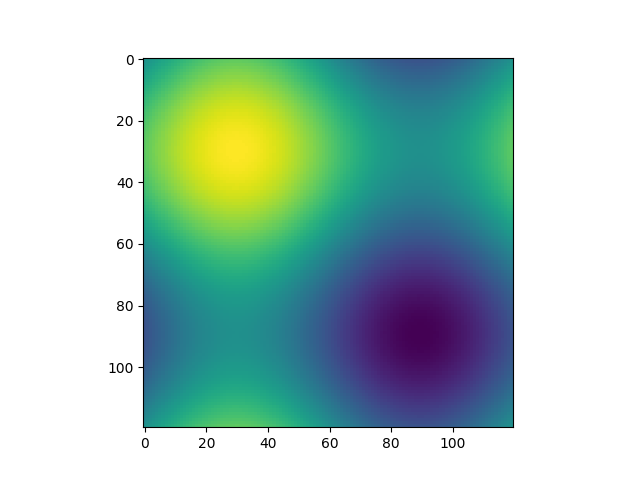

In [25]:
fig, ax = plt.subplots(1,1)
im = ax.imshow(ourfunc(X, Y))

@interact(x_shift=(-10,10,0.1), y_shift=(-10,10,0.1))
def update_imshow(x_shift,y_shift):
    data = ourfunc(X+x_shift, Y+y_shift)
    im.set_data(data)
    plt.draw()
    
    

3D is also really easy using the `projection` argument

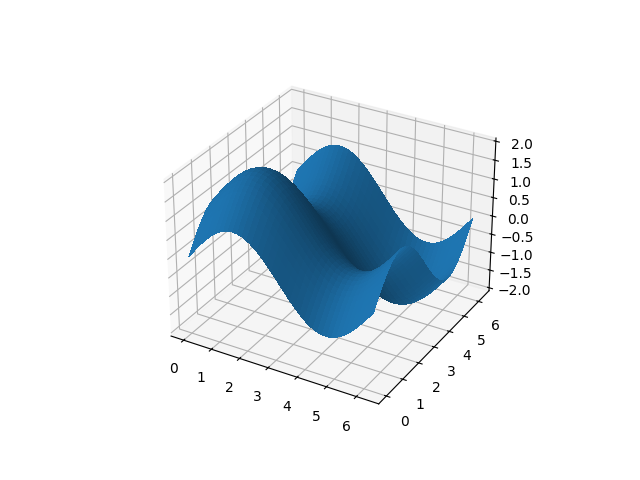

In [26]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

Z = ourfunc(X, Y)

surf = ax.plot_surface(X, Y, Z,
                       linewidth=0, antialiased=False)
plt.show()

## Plotly

Great library for 3d plotting

And again it can be interactive! With a bit of hacking

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

Z = ourfunc(X, Y)

surf = [ax.plot_surface(X, Y, Z,
                       linewidth=0, antialiased=False)]

@interact(x_shift=(-10,10,0.1), y_shift=(-10,10,0.1))
def update_imshow(x_shift,y_shift):
    surf[0].remove()
    Z = ourfunc(X+x_shift, Y+y_shift)
    surf[0] = ax.plot_surface(X, Y, Z,
                       linewidth=0, antialiased=False)
    plt.draw()

## Animations

Finally lets try animations.

Animations work almost exactly like the `interact` except we make use of the `FuncAnimation` functions from matplotlib animations. Lets try it out:

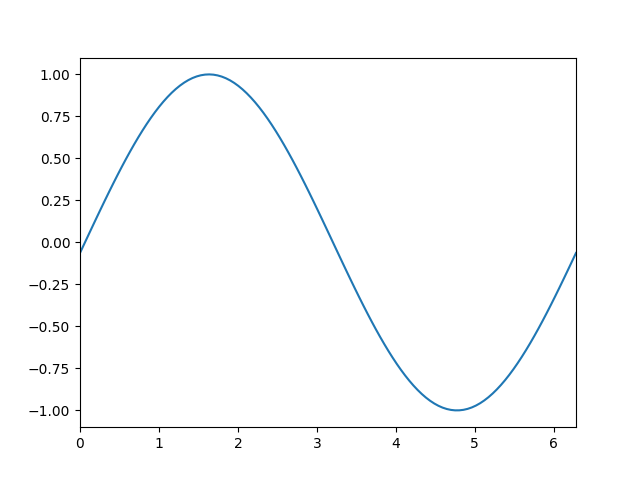

In [30]:
from matplotlib.animation import FuncAnimation


fig, ax = plt.subplots(1,1)

line, = ax.plot([])     # A tuple unpacking to unpack the only plot

# Fix the axes
ax.set_xlim(0, 2*np.pi)
ax.set_ylim(-1.1, 1.1)

# build an update function like interact except we only have one argument 
def animate(frame_num):
    y = np.sin(x + 2*np.pi * frame_num/100)
    line.set_data((x, y))
    return line

anim = FuncAnimation(fig, animate, frames=100, interval=20)
anim.save('plot.gif')

In [31]:
# Will not work on the browser.
from IPython import display
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()                   # avoid plotting a spare static plot